# The Irish Times Headlines NLP & Sentiment Analysis
## Christopher White
## September 24th 2021

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('ireland-news-headlines.csv')

In [19]:
df.shape

(1484340, 3)

In [20]:
df.duplicated().sum()

0

In [21]:
df.head()

publish_date headline_category  \
0      19960102              news   
1      19960102              news   
2      19960102              news   
3      19960102              news   
4      19960102              news   

                                     headline_text  
0         UUP sees possibility of voting Major out  
1   Pubs targeted as curbs on smoking are extended  
2  Papers reveal secret links with O'Neill cabinet  
3      Domestic chaos as Italy takes EU presidency  
4     Learning about the star to which we owe life

In [22]:
set([category for category in df.headline_category if "." not in category] )

{'business', 'culture', 'lifestyle', 'news', 'opinion', 'removed', 'sport'}

In [23]:
df.headline_category = df.headline_category.apply(lambda x: x.split(".")[0]) 

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


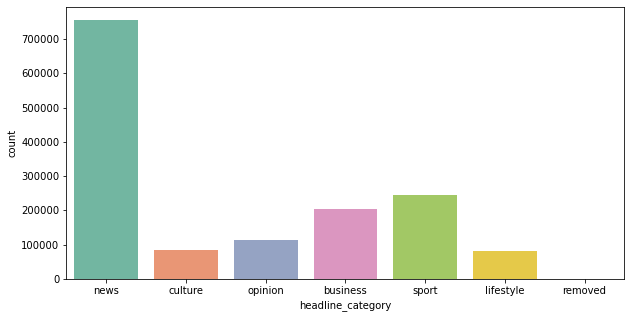

In [24]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df.headline_category, palette="Set2") 

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import regex

wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def clean_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    cleaned_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha()]
    cleaned_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in cleaned_text if not w in stop_words] 
    return " ".join(cleaned_text)

In [27]:
df["cleaned_text"] = df.headline_text.apply(lambda x : clean_text(x, stop)) 

In [28]:
df.head() 

publish_date headline_category  \
0      19960102              news   
1      19960102              news   
2      19960102              news   
3      19960102              news   
4      19960102              news   

                                     headline_text  \
0         UUP sees possibility of voting Major out   
1   Pubs targeted as curbs on smoking are extended   
2  Papers reveal secret links with O'Neill cabinet   
3      Domestic chaos as Italy takes EU presidency   
4     Learning about the star to which we owe life   

                              cleaned_text  
0           uup see possibility vote major  
1            pubs target curb smoke extend  
2   paper reveal secret link neill cabinet  
3  domestic chaos italy take eu presidency  
4                      learn star owe life

# Data Visualization with Word Clouds

In [29]:
from wordcloud import WordCloud

def make_wordcloud(words,title):
    cloud = WordCloud(width=1320, height=680,max_font_size=200, max_words=300, colormap="Greens").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=40)
    plt.show()

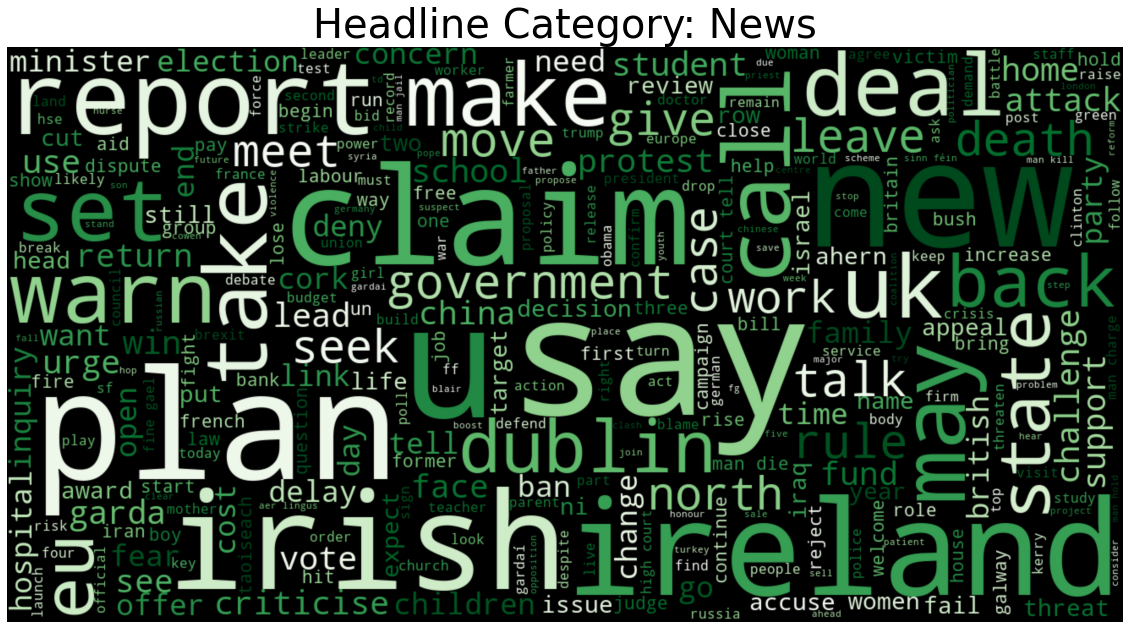

In [30]:
news_text = " ".join(df[df.headline_category == "news"].cleaned_text) 
make_wordcloud(news_text, "Headline Category: News")

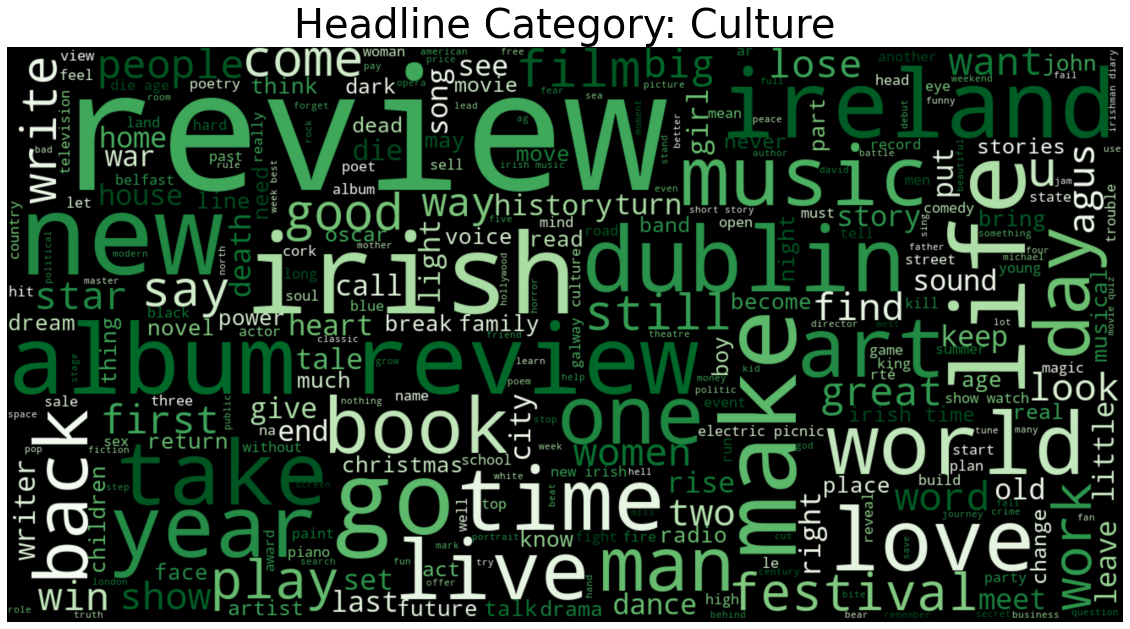

In [31]:
culture_text = " ".join(df[df.headline_category == "culture"].cleaned_text) 
make_wordcloud(culture_text, "Headline Category: Culture")

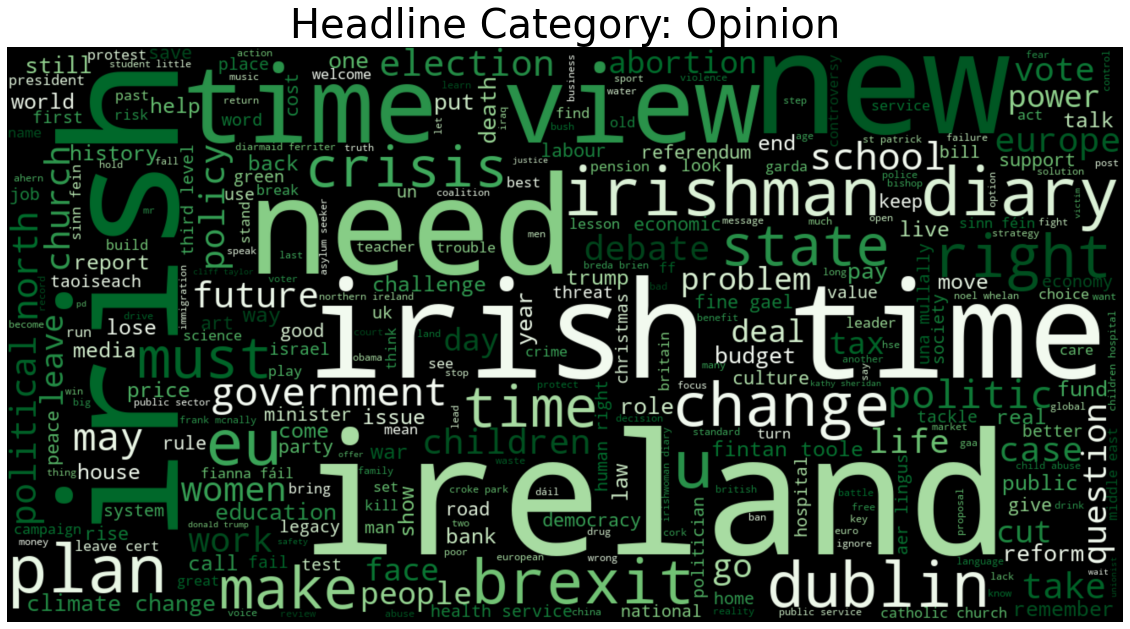

In [32]:
opinion_text = " ".join(df[df.headline_category == "opinion"].cleaned_text) 
make_wordcloud(opinion_text, "Headline Category: Opinion")

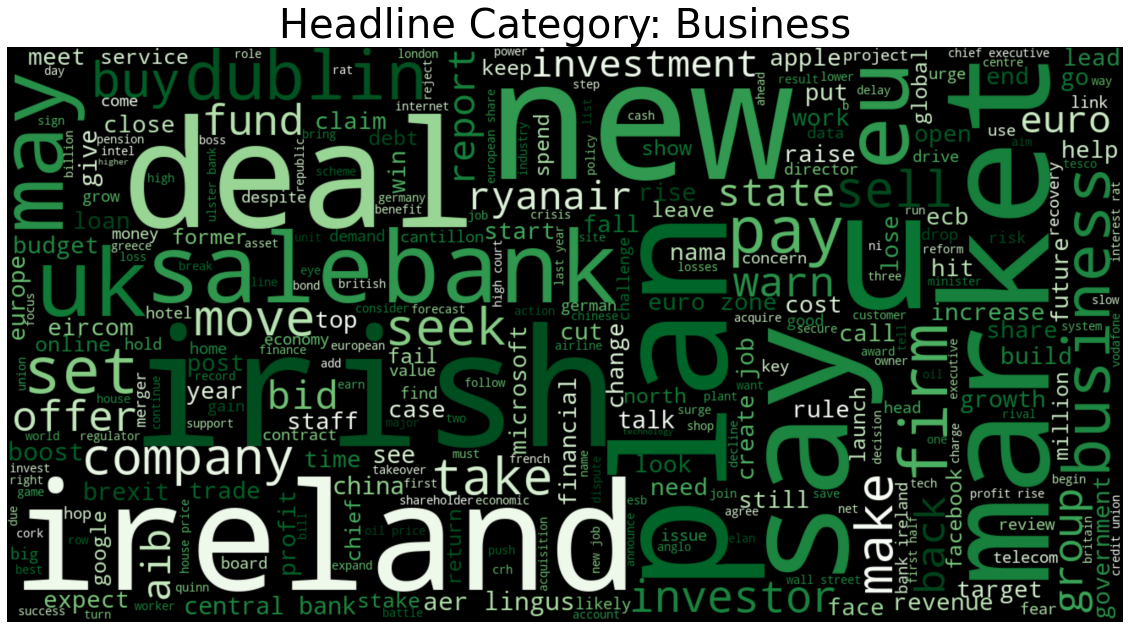

In [33]:
business_text = " ".join(df[df.headline_category == "business"].cleaned_text) 
make_wordcloud(business_text, "Headline Category: Business")

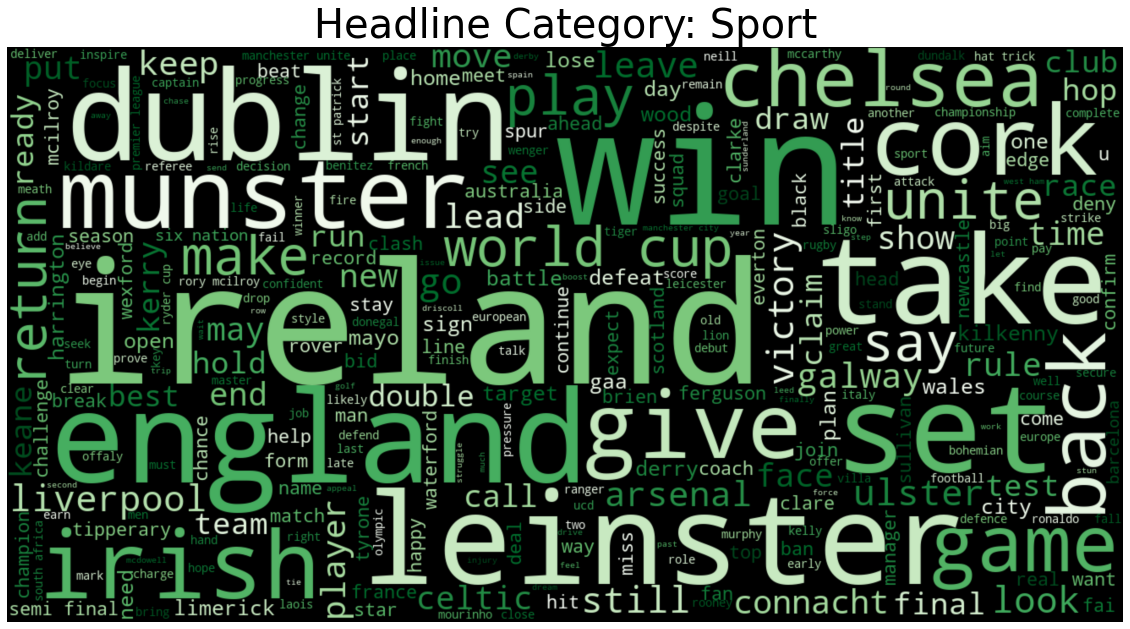

In [34]:
sport_text = " ".join(df[df.headline_category == "sport"].cleaned_text) 
make_wordcloud(sport_text, "Headline Category: Sport")

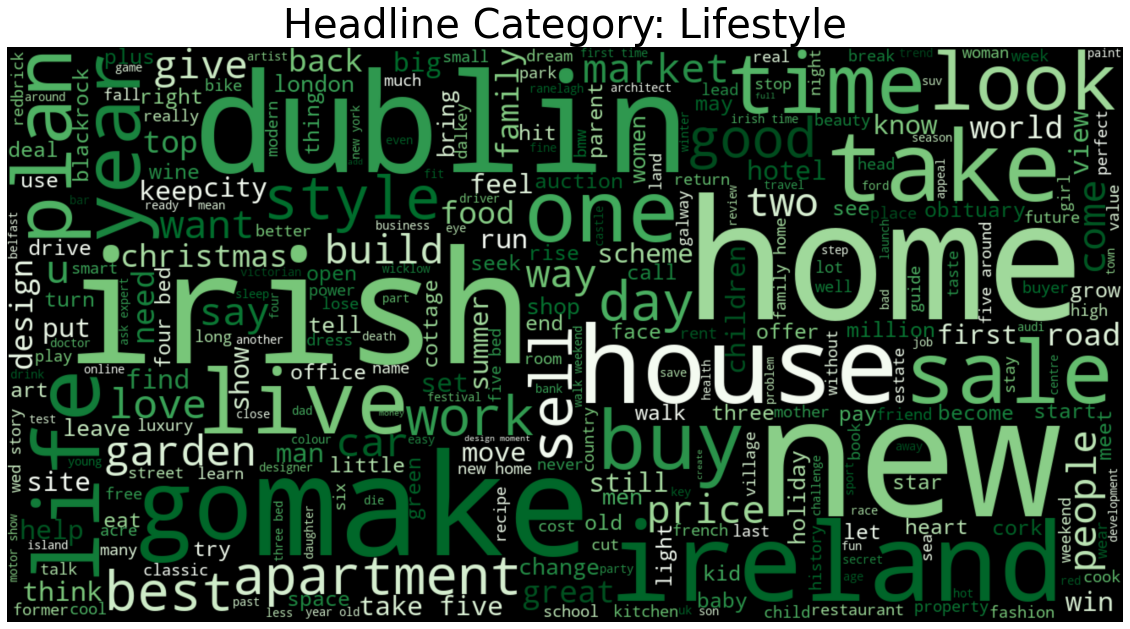

In [35]:
lifestyle_text = " ".join(df[df.headline_category == "lifestyle"].cleaned_text) 
make_wordcloud(lifestyle_text, "Headline Category: Lifestyle")

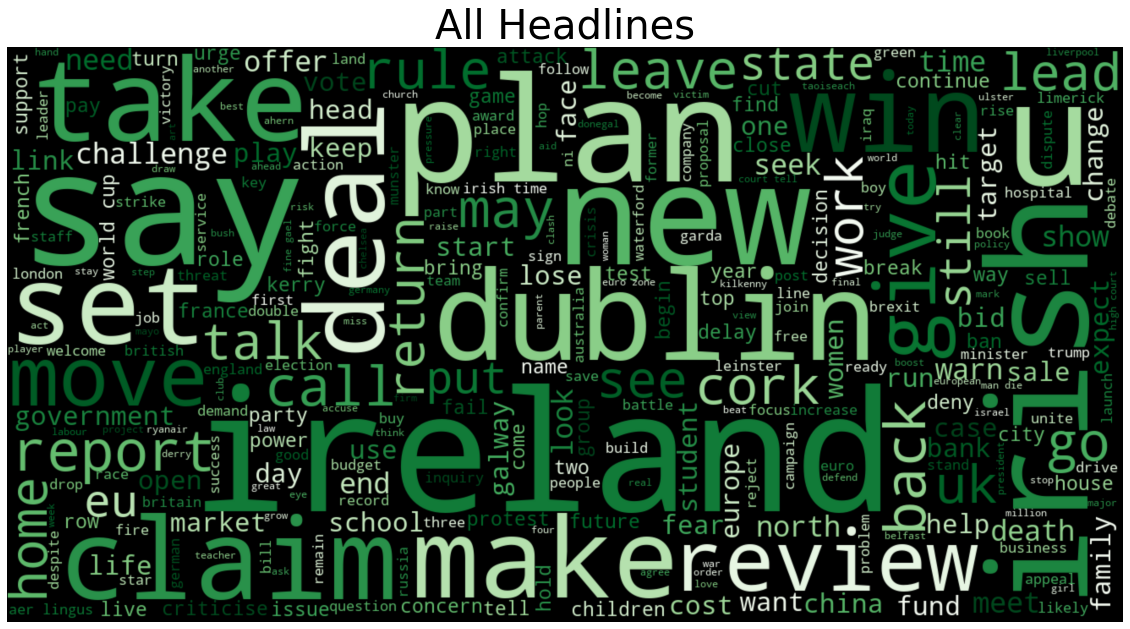

In [36]:
all_text = " ".join(df.cleaned_text) 
make_wordcloud(all_text, "All Headlines")

# TextBlob and Flair Sentiment Analysis Comparison 

In [37]:
from textblob import TextBlob

testimonial = TextBlob(all_text)
print(testimonial.sentiment)

Sentiment(polarity=0.07255875197836902, subjectivity=0.3820976692965885)


In [38]:
testimonial = TextBlob(news_text)
print(testimonial.sentiment)

Sentiment(polarity=0.043731042594487665, subjectivity=0.36383664477693833)


In [39]:
testimonial = TextBlob(culture_text)
print(testimonial.sentiment)

Sentiment(polarity=0.11923712507657205, subjectivity=0.4268085244535013)


In [40]:
testimonial = TextBlob(opinion_text)
print(testimonial.sentiment)

Sentiment(polarity=0.05290373483299039, subjectivity=0.3646763688037807)


In [41]:
testimonial = TextBlob(business_text)
print(testimonial.sentiment)

Sentiment(polarity=0.04670839672636305, subjectivity=0.3488840525286459)


In [42]:
testimonial = TextBlob(sport_text)
print(testimonial.sentiment)

Sentiment(polarity=0.12932103530787897, subjectivity=0.42826586707797326)


In [43]:
testimonial = TextBlob(lifestyle_text)
print(testimonial.sentiment)

Sentiment(polarity=0.15831271345025882, subjectivity=0.43922179185441723)


In [54]:
from flair.models import TextClassifier
from flair.data import Sentence

In [46]:
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(all_text)
classifier.predict(sentence)

print('The Irish Times is: ', sentence.labels)

2021-09-21 19:32:07,856 loading file C:\Users\Chris\.flair\models\sentiment-en-mix-distillbert_4.pt
The Irish Times is:  [NEGATIVE (0.822)]


In [47]:
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(news_text)
classifier.predict(sentence)

print('The News Section of The Irish Times is: ', sentence.labels)

2021-09-21 19:38:45,843 loading file C:\Users\Chris\.flair\models\sentiment-en-mix-distillbert_4.pt
The News Section of The Irish Times is:  [NEGATIVE (0.8315)]


In [48]:
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(culture_text)
classifier.predict(sentence)

print('The Culture Section of The Irish Times is: ', sentence.labels)

2021-09-21 19:42:56,857 loading file C:\Users\Chris\.flair\models\sentiment-en-mix-distillbert_4.pt
The Culture Section of The Irish Times is:  [POSITIVE (0.9979)]


In [49]:
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(opinion_text)
classifier.predict(sentence)

print('The Opinion Section of The Irish Times is: ', sentence.labels)

2021-09-21 19:44:29,580 loading file C:\Users\Chris\.flair\models\sentiment-en-mix-distillbert_4.pt
The Opinion Section of The Irish Times is:  [POSITIVE (0.8738)]


In [50]:
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(lifestyle_text)
classifier.predict(sentence)

print('The Lifestyle Section of The Irish Times is: ', sentence.labels)

2021-09-21 19:45:34,509 loading file C:\Users\Chris\.flair\models\sentiment-en-mix-distillbert_4.pt
The Lifestyle Section of The Irish Times is:  [POSITIVE (0.9878)]


In [51]:
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(business_text)
classifier.predict(sentence)

print('The Business Section of The Irish Times is: ', sentence.labels)

2021-09-21 19:46:22,328 loading file C:\Users\Chris\.flair\models\sentiment-en-mix-distillbert_4.pt
The Business Section of The Irish Times is:  [NEGATIVE (0.7771)]


In [52]:
classifier = TextClassifier.load('en-sentiment')
sentence = Sentence(sport_text)
classifier.predict(sentence)

print('The Sport Section of The Irish Times is: ', sentence.labels)

2021-09-21 19:47:31,884 loading file C:\Users\Chris\.flair\models\sentiment-en-mix-distillbert_4.pt
The Sport Section of The Irish Times is:  [POSITIVE (0.9859)]
